# 線形代数を利用したデータの特徴抽出と次元削減

## 主成分分析（PCA）

必要なライブラリなどの準備

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

データのダウンロードと解凍

## データのダウンロードと解凍
* データ: https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

In [ ]:
# ダウンロードと解凍
!curl -O https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
!unzip human+activity+recognition+using+smartphones.zip
!unzip "UCI HAR Dataset.zip"
!rm -r *MACOSX*

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58.1M    0 58.1M    0     0  11.7M      0 --:--:--  0:00:04 --:--:-- 13.1M
Archive:  human+activity+recognition+using+smartphones.zip
 extracting: UCI HAR Dataset.names   
 extracting: UCI HAR Dataset.zip     
Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt

In [ ]:
# データの読み込み
df = pd.read_table('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)

In [ ]:
# カラム名の設定
columns = pd.read_csv('UCI HAR Dataset/features.txt', sep=' ', header=None, index_col=0)

In [ ]:
df.columns = columns.loc[:, 1]

使用するデータセットの確認（図４の表示）

In [ ]:
df.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


使用するデータセットの可視化（図５の表示）

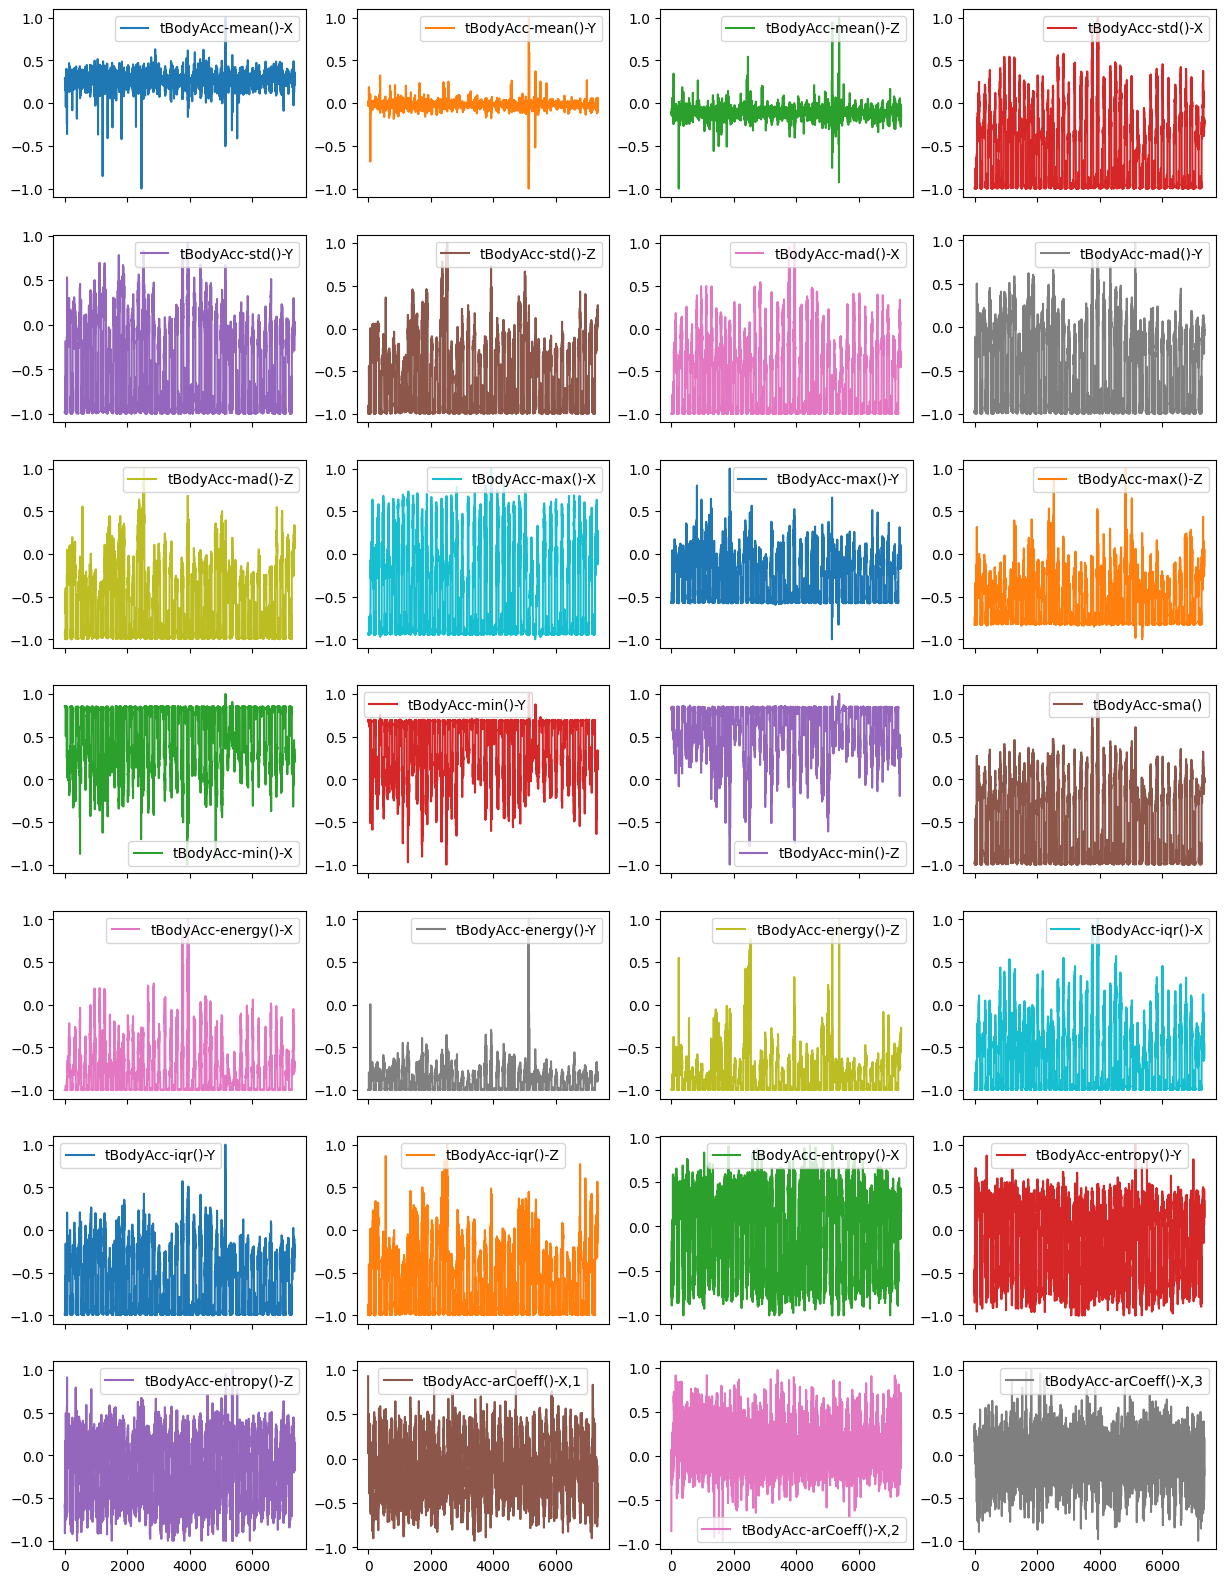

In [ ]:
part_df = df.iloc[:, :28]

part_df.plot(subplots=True, figsize=(15, 20), layout=(-1, 4))
plt.show()

PCAの実行

In [ ]:
pca = PCA(n_components=2)
pca.fit(part_df)

PCA(n_components=2)

In [ ]:
pca_df = pca.transform(part_df)
pca_df = pd.DataFrame(pca_df, columns=['component1', 'component2'])

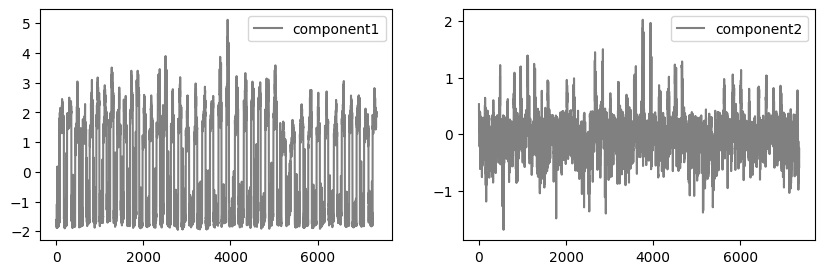

In [ ]:
pca_df.plot(subplots=True, figsize=(10, 3), layout=(-1, 2), color='grey')
plt.show()

# 線形判別分析（Linear Discriminant Analysis）

LDAの下準備

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', sep=' ', header=None, index_col=None)
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

labels = labels[0].map(activity_labels)

各データの行動ラベルの表示（図８の表示）

In [ ]:
labels

,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
7347,WALKING_UPSTAIRS
7348,WALKING_UPSTAIRS
7349,WALKING_UPSTAIRS
7350,WALKING_UPSTAIRS


LDAの実施と結果の可視化（図９（a）の作成）

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(df, labels)

LinearDiscriminantAnalysis(n_components=2)

In [ ]:
lda_data = lda.transform(df)
lda_df = pd.DataFrame(lda_data, columns=['component1', 'component2'])
lda_df['labels'] = labels

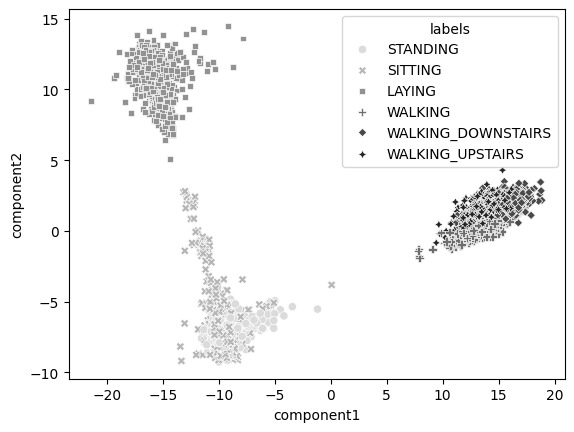

In [ ]:
sns.scatterplot(
    data=lda_df, x='component1', y='component2', hue='labels',
    palette='binary', style='labels') # palette=sns.color_palette('hls', 6)とすると見やすくなります
plt.show()

### PCAとの比較（図９（ｂ）の作成）

In [ ]:
pca = PCA(n_components=2)
pca.fit(df, labels)

PCA(n_components=2)

In [ ]:
pca_data = pca.transform(df)
pca_df = pd.DataFrame(pca_data, columns=['component1', 'component2'])
pca_df['labels'] = labels

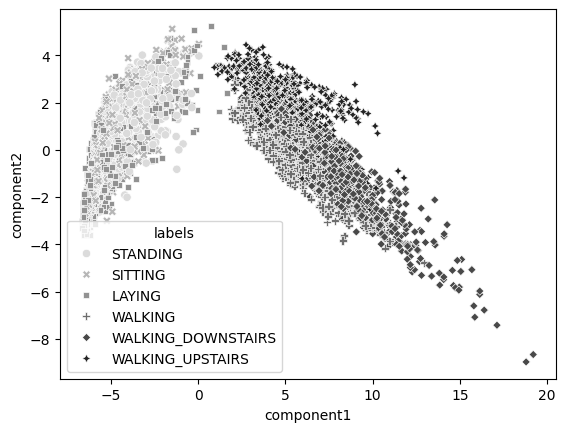

In [ ]:
sns.scatterplot(
    data=pca_df, x='component1', y='component2', hue='labels',
    palette='binary', style='labels') # palette=sns.color_palette('hls', 6)とすると見やすくなります
plt.show()

# 独立成分分析（ICA）

In [ ]:
from sklearn.decomposition import FastICA
import plotly.express as px
import plotly.graph_objects as go

人工データの生成

In [ ]:
# 元の信号
sin_data = np.sin(2 * np.pi * np.arange(1000) / 100)
cos_data = np.cos(np.pi * np.arange(1000) / 100)
trend = np.arange(1000) / 1000

# 信号の組み合わせ（真の変換行列A）
np.random.seed(0)
A = np.random.normal(size=(9, 3))

# 組み合わせて得られたデータ
X = np.dot(A, np.array([sin_data, cos_data, trend])).T

9次元の1000サンプルのデータXの生成と可視化（図11（ｂ））

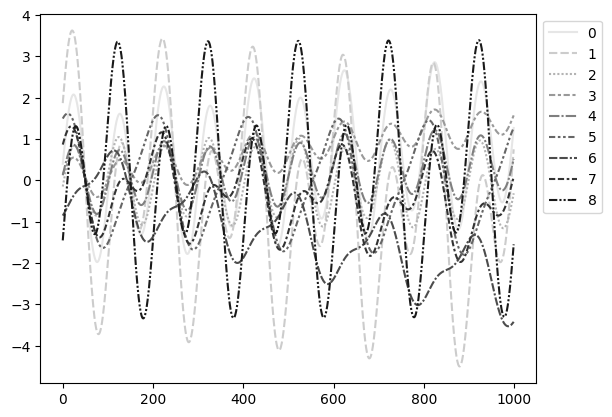

In [ ]:
ax = sns.lineplot(X, palette='binary')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

ICAを実行して、独立した3つに分ける（図11（ｃ））

In [ ]:
ica = FastICA(n_components=3)
ica_y = ica.fit_transform(X)

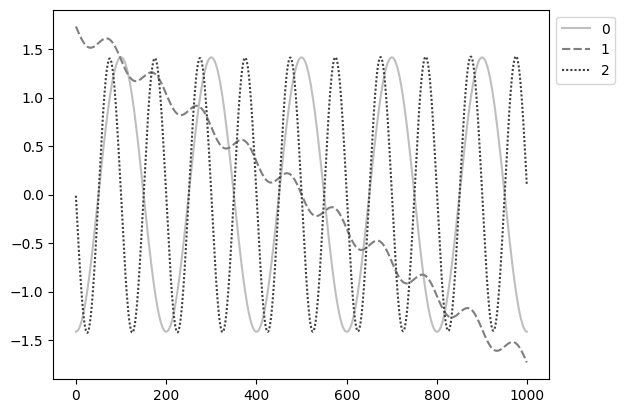

In [ ]:
ax = sns.lineplot(ica_y, palette='binary')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

変換前の元データ（sin,cos,トレンド）の作成と可視化（図11(a）

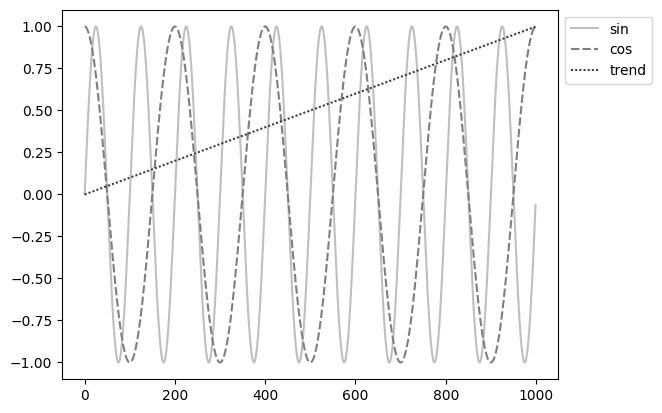

In [ ]:
origin_X = pd.DataFrame(np.concatenate([sin_data.reshape(-1, 1), cos_data.reshape(-1, 1), trend.reshape(-1, 1)], axis=1))
origin_X.columns = ['sin', 'cos', 'trend']
ax = sns.lineplot(origin_X, palette='binary')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

## HARデータのへのICAとPCAの実行
* fBodyAccから始まるカラムのみ利用
* 体の動きは3次元で表現できるはずなので、3次元に落としてみる

In [ ]:
use_columns = [c for c in df.columns if c.startswith('fBodyAcc-')]
body_df = df[use_columns]

In [ ]:
ica = FastICA(n_components=3, max_iter=1000)
ica.fit(body_df)

FastICA(max_iter=1000, n_components=3)

In [ ]:
ica_data = ica.transform(body_df)
ica_df = pd.DataFrame(ica_data, columns=[f'component{i+1}' for i in range(ica.n_components)])
ica_df['labels'] = labels

In [ ]:
pca = PCA(n_components=3)
pca.fit(body_df)
pca_data = pca.transform(body_df)
pca_df = pd.DataFrame(pca_data, columns=[f'component{i+1}' for i in range(pca.n_components)])
pca_df['labels'] = labels

可視化（図１２の作成）

In [ ]:
def plot_2d(df):
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))
  for n, (i, j) in enumerate([(1,2), (1,3), (2,3)]):
    sns.scatterplot(
        data=df, x=f'component{i}', y=f'component{j}', hue='labels',
        palette='binary', style='labels', ax=axes[n])
    axes[n].set_title(f'component{i} vs component{j}')
    axes[n].legend('')
    handles, labels = axes[n].get_legend_handles_labels()
  fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=6)
  plt.show()

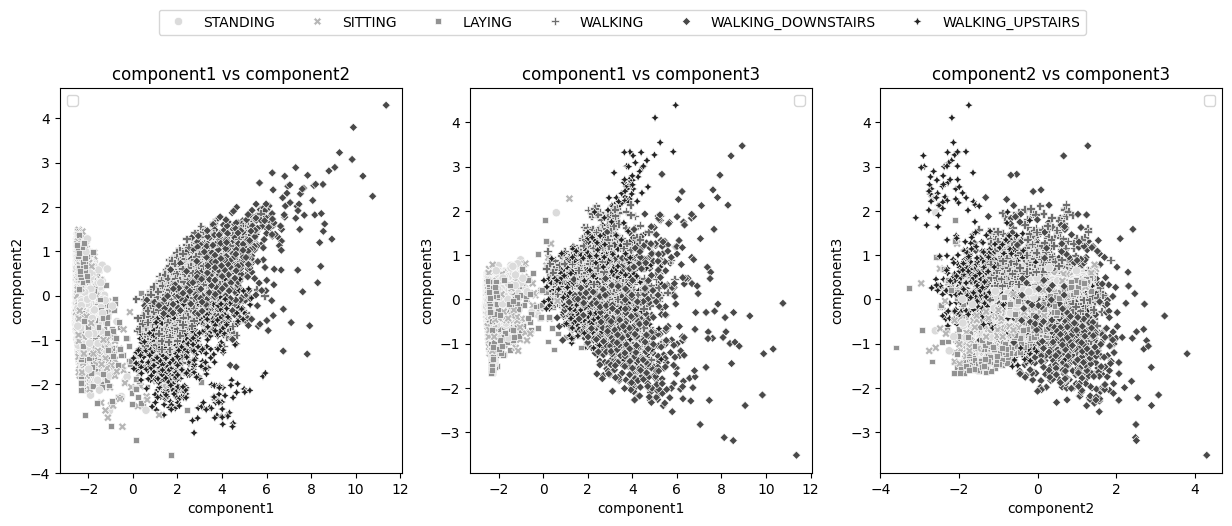

In [ ]:
plot_2d(pca_df)

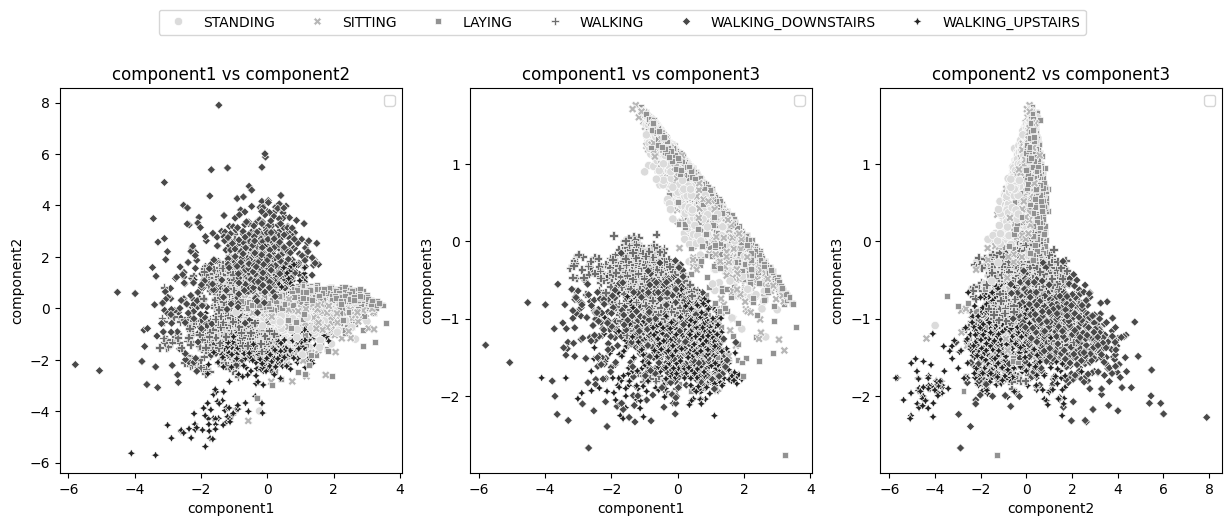

In [ ]:
plot_2d(ica_df)

# 非負値行列因子分解（Non-negative Matrix Factorization）

In [ ]:
from sklearn.decomposition import NMF

## 使用するデータ

In [ ]:
login_history = np.array([
    [5, 0, 1, 0, 0, 0, 1],
    [10, 5, 2, 3, 0, 0, 0],
    [0, 0, 0, 0, 10, 5, 8],
    [0, 0, 1, 3, 5, 0, 9],
    [3, 0, 8, 0, 0, 0, 2],
    [1, 0, 1, 0, 4, 0, 5]
]
)
history = pd.DataFrame(login_history,
                       columns=[f'game{i}' for i in range(login_history.shape[1])],
                       index=[f'user{i}' for i in range(login_history.shape[0])]
)

In [ ]:
history

,game0,game1,game2,game3,game4,game5,game6
user0,5,0,1,0,0,0,1
user1,10,5,2,3,0,0,0
user2,0,0,0,0,10,5,8
user3,0,0,1,3,5,0,9
user4,3,0,8,0,0,0,2
user5,1,0,1,0,4,0,5


NMFの実行（図13の右側の図）

In [ ]:
nmf = NMF(n_components=2)
U = nmf.fit_transform(history)
H = nmf.components_

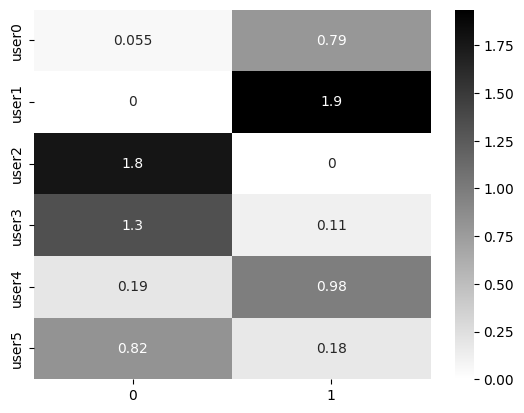

In [ ]:
sns.heatmap(U, cmap='binary', annot=True, yticklabels=history.index)
plt.show()

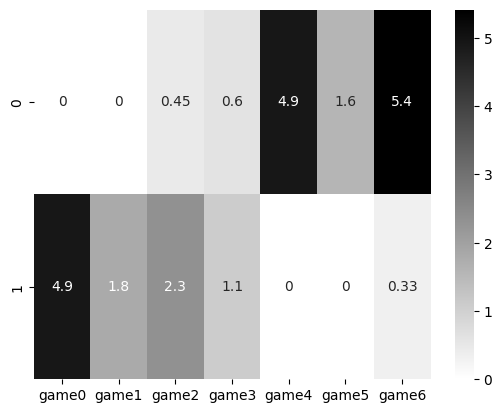

In [ ]:
sns.heatmap(H, cmap='binary', annot=True, xticklabels=history.columns)
plt.show()

## HARデータセットでの実験

#### 被験者で分割して特徴抽出
* fBodyAcc-mean()-ZはfBodyAcc-Zの生データにFFTをかけて、周波数空間に移した後、周波数方向で平均をとったもの

In [ ]:
subject = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', sep=' ', header=None, index_col=None)
subject.columns = ['subject']

In [ ]:
sub_df = df.copy()
sub_df = pd.concat([sub_df, subject], axis=1)

In [ ]:
sub_walk_list = []
for i in range(1, 30):
  subject_walk_z = sub_df[(sub_df['subject'] == i) & (labels == 'WALKING')]['fBodyAcc-mean()-Z']
  subject_walk_z.name = f'subject{i}'
  if subject_walk_z.shape[0] > 1:
    sub_walk_list.append(subject_walk_z.reset_index(drop=True))

In [ ]:
subject_z_walk_df = pd.concat(sub_walk_list, axis=1) + 1.0 # 0以上になるように調整
subject_z_walk_df.dropna(inplace=True, axis=0)

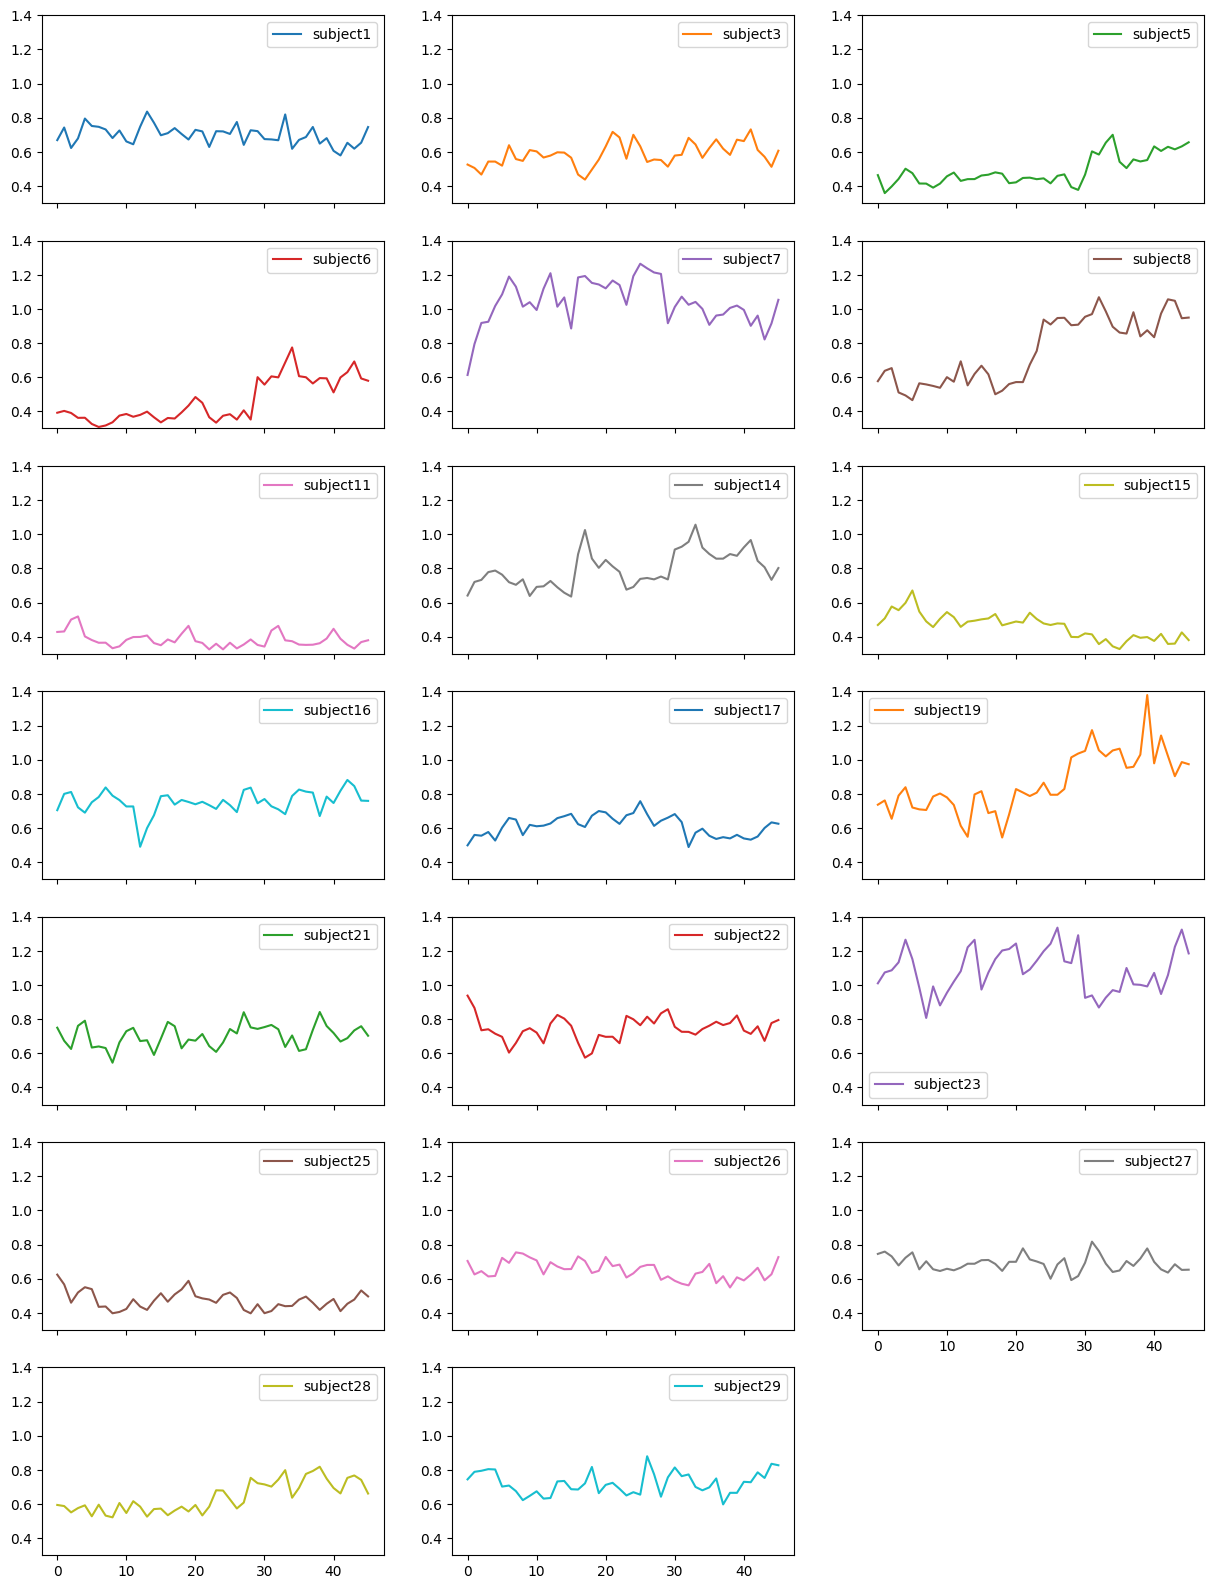

In [ ]:
subject_z_walk_df.plot(subplots=True, figsize=(15, 20), layout=(-1,3), ylim=(0.3, 1.4))
plt.show()

NMFの適用と被検者ベクトルの可視化（図15の作成）

In [ ]:
nmf = NMF(n_components=2, max_iter=10000)
U = nmf.fit_transform(np.abs(subject_z_walk_df))
H = nmf.components_

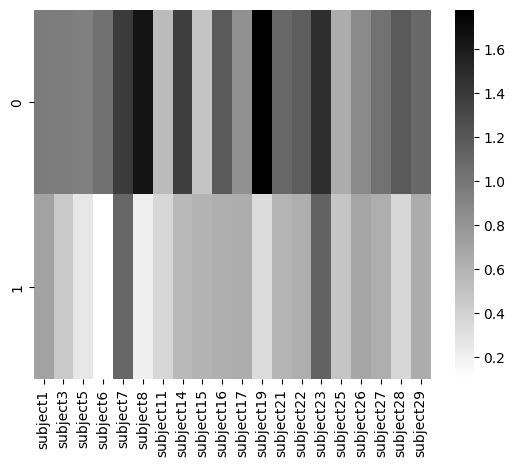

In [ ]:
sns.heatmap(H, cmap='binary', xticklabels=subject_z_walk_df.columns)
plt.show()